In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

import seaborn as sns
import matplotlib.pyplot as plt


In [100]:


#def fromatXvals(X):
#    formattedX = []
#    i = 0
#    for i in range(len(X)):
#        columns = [X[i][j*6:(j+1)*6] for j in range(7)]
#        formattedX.append( np.flipud(np.array(columns).T) )# transposing to get the expes

# Load dataset
data = pd.read_csv('Data/connect+4/connect-4.data', header=None)
#print (data)
# --- formatting X values --- 
# Map cell values
cell_map = {'x': 1, 'o': 2, 'b': 0}
X = data.iloc[:, :-1].map(lambda x: cell_map.get(x, x))
X = X.to_numpy() ## x is input values 
#formattedX = fromatXvals(X) ## getting x to look like a connect 4 boards for display only
print(X)
#print(formattedX)

# --- formating Y values ---
y = data.iloc[:, -1] # getting form 

# hot encoding 
classes = ['draw', 'loss', 'win']
def oneHotEncode(label, classes):
    oneHot = np.zeros(len(classes))
    index = classes.index(label)  # Find the index of the label
    oneHot[index] = 1  # Set the corresponding index to 1
    return oneHot

def oneHotDecode(oneHot, classes):
    index = np.argmax(oneHot)
    return classes[index]
    
# Convert to one-hot encoded labels
y  = np.array([oneHotEncode(label, classes) for label in y])
#print(y)# test

print(X.shape)  # Should be (number_of_samples, 6, 7)
print(y.shape)  # Should be (number_of_samples,)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 2 0 0]
 [1 2 0 ... 1 1 0]
 [1 2 2 ... 0 0 0]]
(67557, 42)
(67557, 3)


In [45]:
# spritting the data for train/ testing 

XTrain, XTest, yTrain, yTest = train_test_split(
    X, y, 
    test_size=0.2,   
    random_state=42 ## locks random state for debugging nothing to do with board size
)

print(yTrain)
print(XTrain)



[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1 2 2 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 2 0 ... 0 0 0]
 [2 2 0 ... 0 0 0]]


In [168]:
 ## inital tests 
model1 = Sequential()

# Input layer 128 neuron
model1.add(Input(shape=(42,)))
model1.add(Dense(128, activation='relu'))

# 1st Hidden layer 64 neurons
model1.add(Dense(64, activation='relu'))
#model1.add(Dropout(0.3))  

# 2nd Hidden layer (32 neurons)
model1.add(Dense(32, activation='relu'))
#model1.add(Dropout(0.3))  

# Output layer 3 neurons for win/draw/loss
model1.add(Dense(3, activation='softmax'))


model1.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 128)                 │           5,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,939 (62.26 KB)

 Trainable params: 15,939 (62.26 KB)

 Non-trainable params: 0 (0.00 B)

In [170]:
model1.fit(XTrain, yTrain, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6775 - loss: 0.7783 - val_accuracy: 0.7385 - val_loss: 0.6497
Epoch 2/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7538 - loss: 0.6108 - val_accuracy: 0.7610 - val_loss: 0.5866
Epoch 3/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7837 - loss: 0.5421 - val_accuracy: 0.7621 - val_loss: 0.5817
Epoch 4/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7925 - loss: 0.5174 - val_accuracy: 0.7951 - val_loss: 0.5138
Epoch 5/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8028 - loss: 0.4887 - val_accuracy: 0.7834 - val_loss: 0.5292
Epoch 6/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8136 - loss: 0.4701 - val_accuracy: 0.7993 - val_loss: 0.5004
Epoch 7/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8173 - loss: 0.4568 - val_accuracy: 0.7995 - val_loss: 0.4922
Epoch 8/20
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8204 - loss: 0.4478 - 

In [172]:
## testing
loss, accuracy = model1.evaluate(XTest, yTest)
print(f"Test accuracy: {accuracy:.4f}")
print(f"Test loss: {loss:.4f}")

423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.8120 - loss: 0.4781
Test accuracy: 0.8128
Test loss: 0.4792


In [62]:
## creating models with varing amounts of neurons to see which is teh best speed accuracy trade off

models = {}
n = 4
while n <= 9:
    model = Sequential()
    # Input layer
    model.add(Input(shape=(42,)))
    model.add(Dense(2**n, activation='relu'))
    
    # 1st Hidden layer 
    model.add(Dense(2**(n-1), activation='relu'))
    #model.add(Dropout(0.3))  
    
    # 2nd Hidden layer 
    model.add(Dense(2**(n-2), activation='relu'))
    #model.add(Dropout(0.3))  
    
    # Output layer 3 neurons for win/draw/loss
    model.add(Dense(3, activation='softmax'))
    
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    models[(2**n)]= model
    n+=1
    
print(models)
 ## testing the data with differnt epoch values
results = pd.DataFrame(columns=['epochs', 'neurons', 'accuracy'])
for startNeuronNum, model in models.items():
    epochVal = 10
    while epochVal <= 30:
        model.fit(XTrain, yTrain, epochs=epochVal, batch_size=32, validation_split=0.2)
        loss, accuracy = model.evaluate(XTest, yTest)
        ## adding to data stucture 
        newResult = {'epochs': epochVal, 'neurons': startNeuronNum, 'accuracy': accuracy}
        results = pd.concat([results, pd.DataFrame([newResult])], ignore_index=True)
        epochVal+=5
    
# formating data 
formatedResults = results.pivot(index='epochs', columns='neurons', values='accuracy')

print(formatedResults)



{16: <Sequential name=sequential_52, built=True>, 32: <Sequential name=sequential_53, built=True>, 64: <Sequential name=sequential_54, built=True>, 128: <Sequential name=sequential_55, built=True>, 256: <Sequential name=sequential_56, built=True>, 512: <Sequential name=sequential_57, built=True>}
Epoch 1/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6359 - loss: 0.8833 - val_accuracy: 0.6658 - val_loss: 0.7991
Epoch 2/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6737 - loss: 0.7828 - val_accuracy: 0.6871 - val_loss: 0.7541
Epoch 3/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6936 - loss: 0.7367 - val_accuracy: 0.7019 - val_loss: 0.7145
Epoch 4/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7086 - loss: 0.7066 - val_accuracy: 0.7126 - val_loss: 0.6954
Epoch 5/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7204 - loss: 0.6837 - val_accuracy: 0.7213 - val_loss: 0.6773
Epoch 6/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/ste

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_14756\2185587422.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([newResult])], ignore_index=True)


1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7491 - loss: 0.6209 - val_accuracy: 0.7417 - val_loss: 0.6427
Epoch 2/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7469 - loss: 0.6272 - val_accuracy: 0.7419 - val_loss: 0.6361
Epoch 3/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7475 - loss: 0.6257 - val_accuracy: 0.7457 - val_loss: 0.6318
Epoch 4/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7533 - loss: 0.6139 - val_accuracy: 0.7465 - val_loss: 0.6330
Epoch 5/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7530 - loss: 0.6142 - val_accuracy: 0.7405 - val_loss: 0.6403
Epoch 6/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7512 - loss: 0.6176 - val_accuracy: 0.7450 - val_loss: 0.6283
Epoch 7/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7508 - loss: 0.6144 - val_accuracy: 0.7494 - val_loss: 0.6225
Epoch 8/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7553 - loss: 0.6106 - val_accurac

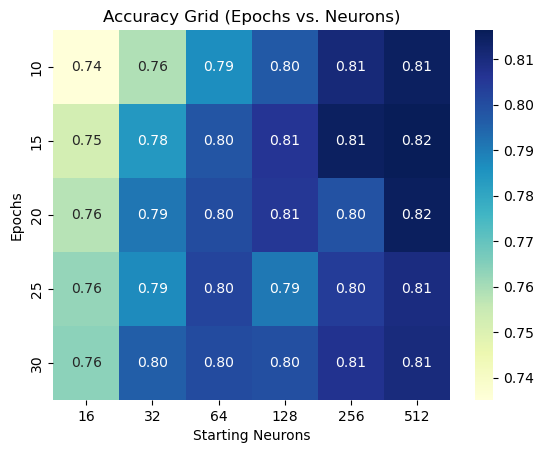

In [66]:
## heat map code 
sns.heatmap(formatedResults, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Accuracy Grid (Epochs vs. Neurons)")
plt.ylabel("Epochs")
plt.xlabel("Starting Neurons")
plt.show()

In [72]:
formatedResults
best = results.loc[results['accuracy'].idxmax()]
print(f"Best config: epochs={best['epochs']}, neurons={best['neurons']}, accuracy={best['accuracy']}")

Best config: epochs=15, neurons=512, accuracy=0.8163854479789734


In [88]:
## the best model
bestModel = Sequential()

# Input layer 
bestModel.add(Input(shape=(42,)))
bestModel.add(Dense(best['neurons'], activation='relu'))

# 1st Hidden layer
bestModel.add(Dense(int(best['neurons']/2), activation='relu'))
#model1.add(Dropout(0.3))  

# 2nd Hidden layer 
bestModel.add(Dense(int(best['neurons']/4), activation='relu'))
#model1.add(Dropout(0.3))  

# Output layer 3 neurons for win/draw/loss
bestModel.add(Dense(3, activation='softmax'))


bestModel.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
bestModel.fit(XTrain, yTrain, epochs=best['epochs'], batch_size=32, validation_split=0.2)
bestModel.summary()




Epoch 1/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6914 - loss: 0.7512 - val_accuracy: 0.7604 - val_loss: 0.6026
Epoch 2/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7740 - loss: 0.5638 - val_accuracy: 0.7820 - val_loss: 0.5488
Epoch 3/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7989 - loss: 0.5012 - val_accuracy: 0.7906 - val_loss: 0.5096
Epoch 4/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8153 - loss: 0.4603 - val_accuracy: 0.7994 - val_loss: 0.5185
Epoch 5/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8284 - loss: 0.4241 - val_accuracy: 0.8146 - val_loss: 0.4678
Epoch 6/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8341 - loss: 0.4059 - val_accuracy: 0.8188 - val_loss: 0.4584
Epoch 7/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8460 - loss: 0.3820 - val_accuracy: 0.8094 - val_loss: 0.4734
Epoch 8/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8543 - loss: 0.3604 - 

Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_246 (Dense)                    │ (None, 512)                 │          22,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_247 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_248 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_249 (Dense)                    │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559,883 (2.14 MB)

 Trainable params: 186,627 (729.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 373,256 (1.42 MB)

In [92]:
## storing in file
bestModel.save("Models/NeuaralNetwork_Connect4.keras")

In [156]:
#tests for game agent
testData = [
  2, 1, 2, 0, 0, 0, 0,  # row 0 (top)
  1, 2, 1, 0, 0, 0, 0,  # row 1
  2, 1, 2, 1, 0, 0, 0,  # row 2
  1, 2, 2, 2, 0, 0, 0,  # row 3
  1, 2, 2, 1, 0, 0, 2,  # row 4
  1, 2, 1, 1, 0, 0, 2   # row 5 (bottom)
]
encodedInput = np.array(testData).reshape(1, 42)
probs = model.predict(encodedInput)
print(probs)
index = np.argmax(probs)
print(oneHotDecode(probs, classes))
confidence = round(probs[0][index],3)
print(confidence)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[1.6983686e-03 9.9819821e-01 1.0347831e-04]]
loss
0.998
